In [42]:
import os,sys
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import numpy as np
import skimage.util
import scipy.ndimage.filters
import scipy.misc
import scipy.io

In [43]:
# Loading the dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
mkdir "cifar10"

mkdir: cannot create directory 'cifar10': File exists


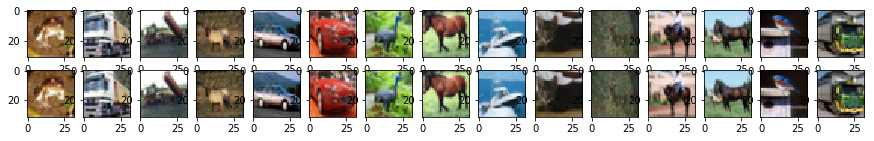

In [16]:
# AWGN Workout
f, a = plt.subplots(2, 15, figsize=(15, 2))
for i in range(15):
    I = x_train[i, :, :, :]
    tilda_I = skimage.util.random_noise(I, mode='gaussian', var=0.0001)
    a[0][i].imshow(I)
    a[1][i].imshow(tilda_I)

plt.draw()
plt.show()

In [4]:
# AWGN
num_train = x_train.shape[0]
# Initializing clean and distorted training samples
train_clean = np.zeros((32, 32, 3, 5*num_train), dtype='uint8') 
train_dist = np.zeros((32, 32, 3, 5*num_train), dtype='uint8')

# Processing the training samples
for idx in range(num_train):
    I_clean = x_train[idx, :, :, :]
    # No distortion
    I_dist = I_clean
    train_clean[:, :, :, 5*idx] = I_clean
    train_dist[:, :, :, 5*idx] = I_dist
    # Distortion level 1
    I_dist = 255*skimage.util.random_noise(I_clean, mode='gaussian', var=0.001)
    train_clean[:, :, :, 5*idx+1] = I_clean
    train_dist[:, :, :, 5*idx+1] = I_dist
    # Distortion level 2
    I_dist = 255*skimage.util.random_noise(I_clean, mode='gaussian', var=0.01)
    train_clean[:, :, :, 5*idx+2] = I_clean
    train_dist[:, :, :, 5*idx+2] = I_dist
    # Distortion level 3
    I_dist = 255*skimage.util.random_noise(I_clean, mode='gaussian', var=0.05)
    train_clean[:, :, :, 5*idx+3] = I_clean
    train_dist[:, :, :, 5*idx+3] = I_dist
    # Distortion level 4
    I_dist = 255*skimage.util.random_noise(I_clean, mode='gaussian', var=0.1)
    train_clean[:, :, :, 5*idx+4] = I_clean
    train_dist[:, :, :, 5*idx+4] = I_dist
    
    # Display
    if idx%5000 == 0:
        print '%d/%d images done!' % (idx, num_train)
print 'Adding AWGN done for training images!'                                      
scipy.io.savemat('cifar10/data_awgn.mat',{'train_clean': train_clean, 'train_dist': train_dist})

0/50000 images done!
5000/50000 images done!
10000/50000 images done!
15000/50000 images done!
20000/50000 images done!
25000/50000 images done!
30000/50000 images done!
35000/50000 images done!
40000/50000 images done!
45000/50000 images done!
Adding AWGN done for training images!


In [8]:
# AWGN
num_test = x_test.shape[0]
# Initializing clean and distorted training samples
test_clean = np.zeros((32, 32, 3, 5*num_test), dtype='uint8') 
test_dist = np.zeros((32, 32, 3, 5*num_test), dtype='uint8')

# Processing the testing samples
for idx in range(num_test):
    I_clean = x_test[idx, :, :, :]    
    # No distortion
    I_dist = I_clean
    test_clean[:, :, :, 5*idx] = I_clean
    test_dist[:, :, :, 5*idx] = I_dist
    # Distortion level 1
    I_dist = 255*skimage.util.random_noise(I_clean, mode='gaussian', var=0.001)
    test_clean[:, :, :, 5*idx+1] = I_clean
    test_dist[:, :, :, 5*idx+1] = I_dist
    # Distortion level 2
    I_dist = 255*skimage.util.random_noise(I_clean, mode='gaussian', var=0.01)
    test_clean[:, :, :, 5*idx+2] = I_clean
    test_dist[:, :, :, 5*idx+2] = I_dist
    # Distortion level 3
    I_dist = 255*skimage.util.random_noise(I_clean, mode='gaussian', var=0.05)
    test_clean[:, :, :, 5*idx+3] = I_clean
    test_dist[:, :, :, 5*idx+3] = I_dist
    # Distortion level 4
    I_dist = 255*skimage.util.random_noise(I_clean, mode='gaussian', var=0.1)
    test_clean[:, :, :, 5*idx+4] = I_clean
    test_dist[:, :, :, 5*idx+4] = I_dist
    
    # Display
    if idx%1000 == 0:
        print '%d/%d images done!' % (idx, num_test)
print 'Adding AWGN done for testing images!'

train_data = scipy.io.loadmat('cifar10/data_awgn.mat')
train_clean = train_data["train_clean"]
train_dist = train_data["train_dist"]
scipy.io.savemat('cifar10/data_awgn.mat',{'train_clean': train_clean, 'train_dist': train_dist,
                                          'test_clean': test_clean, 'test_dist': test_dist})

0/10000 images done!
1000/10000 images done!
2000/10000 images done!
3000/10000 images done!
4000/10000 images done!
5000/10000 images done!
6000/10000 images done!
7000/10000 images done!
8000/10000 images done!
9000/10000 images done!
Adding AWGN done for testing images!


(32, 32, 3, 250000) (32, 32, 3, 250000)


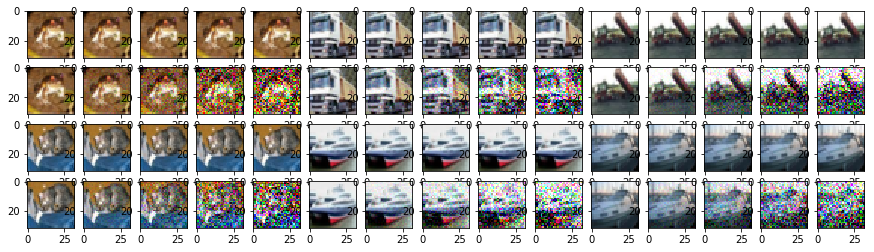

In [11]:
# AWGN check
data = scipy.io.loadmat('cifar10/data_awgn.mat')
train_clean = data['train_clean']
train_dist = data['train_dist']
test_clean = data['test_clean']
test_dist = data['test_dist']
print train_clean.shape, train_dist.shape
f, a = plt.subplots(4, 15, figsize=(15, 4))
for i in range(15):
    a[0][i].imshow(train_clean[:, :, :, i])
    a[1][i].imshow(train_dist[:, :, :, i])
    a[2][i].imshow(test_clean[:, :, :, i])
    a[3][i].imshow(test_dist[:, :, :, i])
plt.draw()
plt.show()

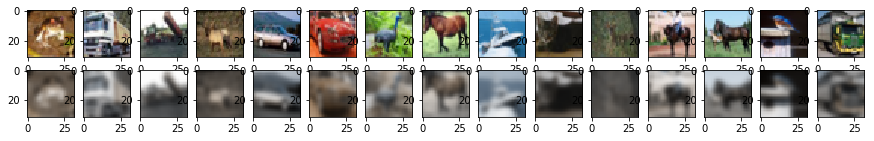

In [26]:
# GBLUR Workout
f, a = plt.subplots(2, 15, figsize=(15, 2))
for i in range(15):
    I = x_train[i, :, :, :]
    tilda_I = scipy.ndimage.filters.gaussian_filter(I, sigma=1.5)
    a[0][i].imshow(I)
    a[1][i].imshow(tilda_I)
plt.draw()
plt.show()

In [31]:
# GBLUR
num_train = x_train.shape[0]
# Initializing clean and distorted training samples
train_clean = np.zeros((32, 32, 3, 5*num_train), dtype='uint8') 
train_dist = np.zeros((32, 32, 3, 5*num_train), dtype='uint8')

# Processing the training samples
for idx in range(num_train):
    I_clean = x_train[idx, :, :, :]
    # No distortion
    I_dist = I_clean
    train_clean[:, :, :, 5*idx] = I_clean
    train_dist[:, :, :, 5*idx] = I_dist
    # Distortion level 1
    I_dist = scipy.ndimage.filters.gaussian_filter(I_clean, sigma=0.5)
    train_clean[:, :, :, 5*idx+1] = I_clean
    train_dist[:, :, :, 5*idx+1] = I_dist
    # Distortion level 2
    I_dist = scipy.ndimage.filters.gaussian_filter(I_clean, sigma=1.0)
    train_clean[:, :, :, 5*idx+2] = I_clean
    train_dist[:, :, :, 5*idx+2] = I_dist
    # Distortion level 3
    I_dist = scipy.ndimage.filters.gaussian_filter(I_clean, sigma=1.2)
    train_clean[:, :, :, 5*idx+3] = I_clean
    train_dist[:, :, :, 5*idx+3] = I_dist
    # Distortion level 4
    I_dist = scipy.ndimage.filters.gaussian_filter(I_clean, sigma=1.5)
    train_clean[:, :, :, 5*idx+4] = I_clean
    train_dist[:, :, :, 5*idx+4] = I_dist
    
    # Display
    if idx%5000 == 0:
        print '%d/%d images done!' % (idx, num_train)
print 'Adding GBLUR done for training images!'                                      
scipy.io.savemat('cifar10/data_gblur.mat',{'train_clean': train_clean, 'train_dist': train_dist})

0/50000 images done!
5000/50000 images done!
10000/50000 images done!
15000/50000 images done!
20000/50000 images done!
25000/50000 images done!
30000/50000 images done!
35000/50000 images done!
40000/50000 images done!
45000/50000 images done!
Adding GBLUR done for training images!


In [32]:
# GBLUR
num_test = x_test.shape[0]
# Initializing clean and distorted training samples
test_clean = np.zeros((32, 32, 3, 5*num_test), dtype='uint8') 
test_dist = np.zeros((32, 32, 3, 5*num_test), dtype='uint8')

# Processing the testing samples
for idx in range(num_test):
    I_clean = x_test[idx, :, :, :]    
    # No distortion
    I_dist = I_clean
    test_clean[:, :, :, 5*idx] = I_clean
    test_dist[:, :, :, 5*idx] = I_dist
    # Distortion level 1
    I_dist = scipy.ndimage.filters.gaussian_filter(I_clean, sigma=0.5)
    test_clean[:, :, :, 5*idx+1] = I_clean
    test_dist[:, :, :, 5*idx+1] = I_dist
    # Distortion level 2
    I_dist = scipy.ndimage.filters.gaussian_filter(I_clean, sigma=1.0)
    test_clean[:, :, :, 5*idx+2] = I_clean
    test_dist[:, :, :, 5*idx+2] = I_dist
    # Distortion level 3
    I_dist = scipy.ndimage.filters.gaussian_filter(I_clean, sigma=1.2)
    test_clean[:, :, :, 5*idx+3] = I_clean
    test_dist[:, :, :, 5*idx+3] = I_dist
    # Distortion level 4
    I_dist = scipy.ndimage.filters.gaussian_filter(I_clean, sigma=1.5)
    test_clean[:, :, :, 5*idx+4] = I_clean
    test_dist[:, :, :, 5*idx+4] = I_dist
    
    # Display
    if (idx+1)%1000 == 0:
        print '%d/%d images done!' % (idx+1, num_test)
print 'Adding GBLUR done for testing images!'

train_data = scipy.io.loadmat('cifar10/data_gblur.mat')
train_clean = train_data["train_clean"]
train_dist = train_data["train_dist"]
scipy.io.savemat('cifar10/data_gblur.mat',{'train_clean': train_clean, 'train_dist': train_dist,
                                           'test_clean': test_clean, 'test_dist': test_dist})

1000/10000 images done!
2000/10000 images done!
3000/10000 images done!
4000/10000 images done!
5000/10000 images done!
6000/10000 images done!
7000/10000 images done!
8000/10000 images done!
9000/10000 images done!
10000/10000 images done!
Adding GBLUR done for testing images!


(32, 32, 3, 250000) (32, 32, 3, 250000)


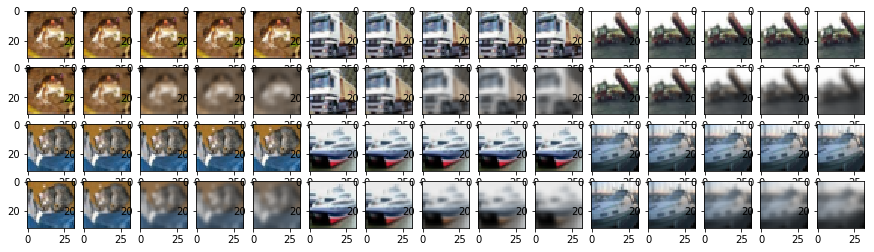

In [33]:
# GBLUR check
data = scipy.io.loadmat('cifar10/data_gblur.mat')
train_clean = data['train_clean']
train_dist = data['train_dist']
test_clean = data['test_clean']
test_dist = data['test_dist']
print train_clean.shape, train_dist.shape
f, a = plt.subplots(4, 15, figsize=(15, 4))
for i in range(15):
    a[0][i].imshow(train_clean[:, :, :, i])
    a[1][i].imshow(train_dist[:, :, :, i])
    a[2][i].imshow(test_clean[:, :, :, i])
    a[3][i].imshow(test_dist[:, :, :, i])
plt.draw()
plt.show()

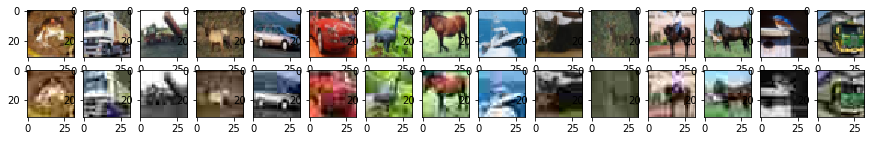

In [47]:
# JPEG Workout
f, a = plt.subplots(2, 15, figsize=(15, 2))
for i in range(15):
    I = x_train[i, :, :, :]
    scipy.misc.imsave('inp.jpg', I)
    Ibin = Image.open('inp.jpg')
    Ibin.save('out.jpg', format='JPEG', quality=10)
    tilda_I = np.array(Image.open('out.jpg'))
    a[0][i].imshow(I)
    a[1][i].imshow(tilda_I)
    os.remove("inp.jpg")
    os.remove("out.jpg")
plt.draw()
plt.show()

In [48]:
# JPEG
num_train = x_train.shape[0]
# Initializing clean and distorted training samples
train_clean = np.zeros((32, 32, 3, 5*num_train), dtype='uint8') 
train_dist = np.zeros((32, 32, 3, 5*num_train), dtype='uint8')

# Processing the training samples
for idx in range(num_train):
    I_clean = x_train[idx, :, :, :]
    scipy.misc.imsave('inp.jpg', I_clean)
    Ibin = Image.open('inp.jpg')
    # No distortion
    I_dist = I_clean
    train_clean[:, :, :, 5*idx] = I_clean
    train_dist[:, :, :, 5*idx] = I_dist
    # Distortion level 1
    Ibin.save('out.jpg', format='JPEG', quality=75)
    I_dist = np.array(Image.open('out.jpg'))
    train_clean[:, :, :, 5*idx+1] = I_clean
    train_dist[:, :, :, 5*idx+1] = I_dist
    # Distortion level 2
    Ibin.save('out.jpg', format='JPEG', quality=50)
    I_dist = np.array(Image.open('out.jpg'))
    train_clean[:, :, :, 5*idx+2] = I_clean
    train_dist[:, :, :, 5*idx+2] = I_dist
    # Distortion level 3
    Ibin.save('out.jpg', format='JPEG', quality=25)
    I_dist = np.array(Image.open('out.jpg'))    
    train_clean[:, :, :, 5*idx+3] = I_clean
    train_dist[:, :, :, 5*idx+3] = I_dist
    # Distortion level 4
    Ibin.save('out.jpg', format='JPEG', quality=10)
    I_dist = np.array(Image.open('out.jpg'))
    train_clean[:, :, :, 5*idx+4] = I_clean
    train_dist[:, :, :, 5*idx+4] = I_dist
    
    # Display
    if (idx+1)%5000 == 0:
        print '%d/%d images done!' % (idx+1, num_train)
print 'Adding JPEG done for training images!'                                      
scipy.io.savemat('cifar10/data_jpeg.mat',{'train_clean': train_clean, 'train_dist': train_dist})

5000/50000 images done!
10000/50000 images done!
15000/50000 images done!
20000/50000 images done!
25000/50000 images done!
30000/50000 images done!
35000/50000 images done!
40000/50000 images done!
45000/50000 images done!
50000/50000 images done!
Adding JPEG done for training images!


In [49]:
# JPEG
num_test = x_test.shape[0]
# Initializing clean and distorted training samples
test_clean = np.zeros((32, 32, 3, 5*num_test), dtype='uint8') 
test_dist = np.zeros((32, 32, 3, 5*num_test), dtype='uint8')

# Processing the training samples
for idx in range(num_test):
    I_clean = x_test[idx, :, :, :]
    scipy.misc.imsave('inp.jpg', I_clean)
    Ibin = Image.open('inp.jpg')
    # No distortion
    I_dist = I_clean
    test_clean[:, :, :, 5*idx] = I_clean
    test_dist[:, :, :, 5*idx] = I_dist
    # Distortion level 1
    Ibin.save('out.jpg', format='JPEG', quality=75)
    I_dist = np.array(Image.open('out.jpg'))
    test_clean[:, :, :, 5*idx+1] = I_clean
    test_dist[:, :, :, 5*idx+1] = I_dist
    # Distortion level 2
    Ibin.save('out.jpg', format='JPEG', quality=50)
    I_dist = np.array(Image.open('out.jpg'))
    test_clean[:, :, :, 5*idx+2] = I_clean
    test_dist[:, :, :, 5*idx+2] = I_dist
    # Distortion level 3
    Ibin.save('out.jpg', format='JPEG', quality=25)
    I_dist = np.array(Image.open('out.jpg'))    
    test_clean[:, :, :, 5*idx+3] = I_clean
    test_dist[:, :, :, 5*idx+3] = I_dist
    # Distortion level 4
    Ibin.save('out.jpg', format='JPEG', quality=10)
    I_dist = np.array(Image.open('out.jpg'))
    test_clean[:, :, :, 5*idx+4] = I_clean
    test_dist[:, :, :, 5*idx+4] = I_dist
    
    # Display
    if (idx+1)%1000 == 0:
        print '%d/%d images done!' % (idx+1, num_test)
print 'Adding JPEG done for testing images!'

train_data = scipy.io.loadmat('cifar10/data_jpeg.mat')
train_clean = train_data["train_clean"]
train_dist = train_data["train_dist"]
scipy.io.savemat('cifar10/data_jpeg.mat',{'train_clean': train_clean, 'train_dist': train_dist,
                                          'test_clean': test_clean, 'test_dist': test_dist})

1000/10000 images done!
2000/10000 images done!
3000/10000 images done!
4000/10000 images done!
5000/10000 images done!
6000/10000 images done!
7000/10000 images done!
8000/10000 images done!
9000/10000 images done!
10000/10000 images done!
Adding JPEG done for testing images!


(32, 32, 3, 250000) (32, 32, 3, 250000)


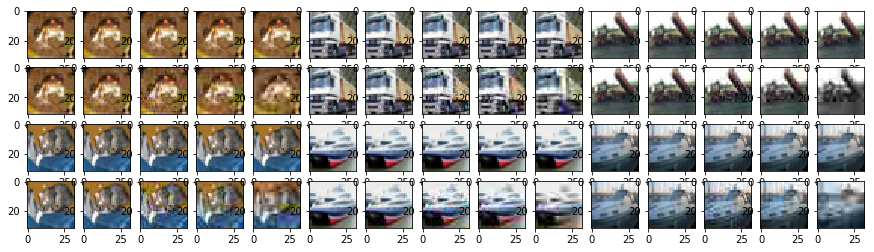

In [50]:
# JPEG check
data = scipy.io.loadmat('cifar10/data_jpeg.mat')
train_clean = data['train_clean']
train_dist = data['train_dist']
test_clean = data['test_clean']
test_dist = data['test_dist']
print train_clean.shape, train_dist.shape
f, a = plt.subplots(4, 15, figsize=(15, 4))
for i in range(15):
    a[0][i].imshow(train_clean[:, :, :, i])
    a[1][i].imshow(train_dist[:, :, :, i])
    a[2][i].imshow(test_clean[:, :, :, i])
    a[3][i].imshow(test_dist[:, :, :, i])
plt.draw()
plt.show()